In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Linear model

In [4]:
"""TODO fix"""

def IRF(t, tau):
    """
    computes neuronal impulse response function with "Gamma shape"
    
    parameters
    t: np.array
        time
    tau: float
        some constant
    """
    #return np.convolve(t, np.exp(-t/tau), mode = 'same')
    return t * np.exp(-t/tau)
    

def R_lin(t, tau, g, T_inp):
    
    """
    computes the linear response to a stimulus for
    
    parameters
    t : np.array
        time
    tau : float
        some constant for IRF
    g : float
        gain factor
    T_inp : np.array
        stimunlus time course
    """
    
    return g* np.convolve(IRF(t, tau), T_inp, mode = 'full')
#     return g* np.convolve(IRF(t, tau), T_inp, mode = 'same')


def BOLD_lin(g):
    """
    sums the predicted time course over a trial
    """
    
    
    return 



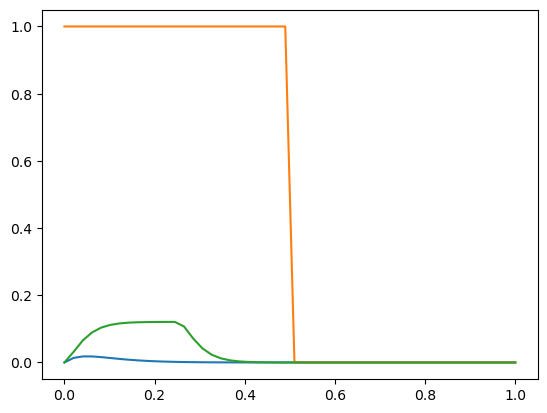

In [5]:
t = np.linspace(0,1)
T_inp = np.hstack((np.ones(25), np.zeros(25)))

tau = 0.05

plt.plot(t, IRF(t, tau))
plt.plot(t, T_inp)
plt.plot(t, R_lin(t, tau, 1, T_inp)[::2]) # ?? conv still unclear
#plt.plot(t, R_lin(t, tau, 1, T_inp)) # ?? conv still unclear

In [6]:
len(IRF(t, tau))

50

In [7]:
import numpy as np

def conv_cut(stimulus, impulse, nTerms):
    output = np.convolve(np.squeeze(stimulus), np.squeeze(impulse), 'full')
    output = output[:nTerms]
    return output

import numpy as np

def gammaPDF(t, tau, n):
    """
    Gamma function - used for impulse response calculations and HIRF
    :param t: Time steps
    :param tau: Time constant
    :param n: Number of exponentials
    :return: Gamma function values
    """
    if np.isscalar(tau):
        tau = [tau]
    
    y = np.zeros_like(t)
    
    for tau_val in tau:
        y += (t / tau_val)**(n - 1) * np.exp(-t / tau_val)
    
    # Normalize to make the area under the curve equal to 1
    y /= np.trapz(y, t)

    return y

# # Example usage:
# t = np.arange(0, 0.3, 0.005)
# tau = 0.1
# n = 2
# gamma_values = gammaPDF(t, tau, n)

# # Ensure the gamma_values is 1-dimensional
# gamma_values = np.squeeze(gamma_values)


def trf_LinModel(param, stim, t):
    # pre-defined variables
    x = {}
    
    # initiate model fit
    x["scale"] = param
    
    # compute response
    # example time course prediction, not really being used in the paper
    irf = gammaPDF(t, 0.1, 2)  # Assuming gammaPDF is defined
    
    linrsp_tc = np.zeros((stim.shape[0], len(t)))

    for k in range(stim.shape[0]):
        linrsp_tc[k, :] = conv_cut(irf, stim[k, :], len(t))

    # linear prediction used to compute the result in the paper
    linrsp = np.sum(stim, axis=1) * x["scale"]

    return linrsp, linrsp_tc


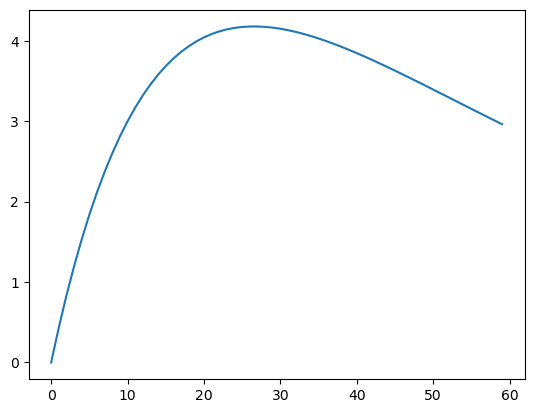

In [8]:
def gammaPDF(t, tau, n):
    """
    Gamma function - used for impulse response calculations and HIRF
    :param t: Time steps
    :param tau: Time constant
    :param n: Number of exponentials
    :return: Gamma function values
    """
    if np.isscalar(tau):
        tau = [tau]
    
    y = np.zeros_like(t)
    
    for tau_val in tau:
        y += (t / tau_val)**(n - 1) * np.exp(-t / tau_val)
    
    # Normalize to make the area under the curve equal to 1
    y /= np.trapz(y, t)
#     y /= np.sum(y)
    

    return y

# Example usage:
t = np.arange(0, 0.3, 0.005)
tau = [0.1, .2]
n = 2
gamma_values = gammaPDF(t, tau, n)

# Ensure the gamma_values is 1-dimensional
gamma_values = np.squeeze(gamma_values)
plt.plot(gamma_values)
#plt.plot(IRF(t, tau))

In [9]:
t = np.linspace(0,1)
T_inp = np.hstack((np.ones(25), np.zeros(25)))

tau = 0.05
linrsp, linrsp_tc = trf_LinModel(tau, T_inp, t)

# plt.plot(t, IRF(t, tau))
# plt.plot(t, T_inp)
# plt.plot(t, R_lin(t, tau, 1, T_inp)[::2]) # ?? conv still unclear
#plt.plot(t, R_lin(t, tau, 1, T_inp)) # ?? conv still unclear
plt.plot(linrsp)
plt.plot(linrsp_tc)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

## CTS model

The linear prediction is divisively normalized?

In [44]:
def BOLD_cts(t, sigma, g, tau, T_inp):
    return g * (np.convolve(IRF(t, tau), T_inp, mode = 'full')**2)/ (sigma ** 2 + (np.convolve(IRF(t, tau), T_inp, mode = 'full')**2))

## Inputs
Here, we rebuild the used inputs from figure 2 A

In [11]:
durations = [0, 17, 33, 67, 134, 267, 533]
fixed_duration = 134
total_duration = 2000 # 2 seconds, eyeballing from the figure
var_duration = np.vstack([np.hstack((np.ones(duration), np.zeros(total_duration - duration))) for duration in durations])
var_isi = np.vstack([np.hstack((np.ones(fixed_duration), np.zeros(duration), np.ones(fixed_duration), np.zeros(total_duration- duration - 2*fixed_duration))) for duration in durations])

In [15]:
np.linspace(0, 2000, 2000).shape
var_duration[i].shape

(2000,)

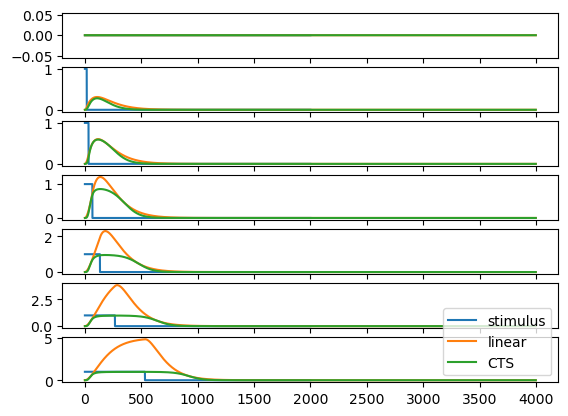

In [56]:
fig, axs = plt.subplots(len(var_duration), 1)
tau = 0.05
t = np.linspace(0, 2000, 2000)
t = np.linspace(0, 1, 2000)
sigma = .5
g = 1

for i, ax in enumerate(axs):
    ax.plot(var_duration[i], label = 'stimulus')
    ax.plot(R_lin(t, tau, 1, var_duration[i]), label = 'linear')
    ax.plot(BOLD_cts(t, sigma, g, tau, var_duration[i]), label = 'CTS')
    
    #ax.plot(IRF(t, tau))
plt.legend()

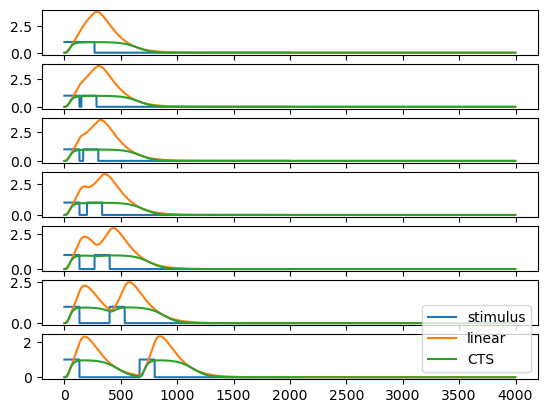

In [58]:
fix, axs = plt.subplots(len(var_isi), 1)
for i, ax in enumerate(axs):
    ax.plot(var_isi[i], label = 'stimulus')
    ax.plot(R_lin(t, tau, 1, var_isi[i]), label = 'linear')
    ax.plot(BOLD_cts(t, sigma, g, tau, var_isi[i]), label = 'CTS')

plt.legend()

In [ ]:
plt.plot(t, R_lin(t, tau, 1, T_inp)[::2]) # ?? conv still unclear
